# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [52]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [54]:
df = pd.read_csv('https://homel.vsb.cz/~pro0199/files/data_exploration/house_prices_dataset.csv', sep=',')
# df = pd.read_csv('house_prices_dataset.csv', sep=',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Price is the most interisting attribute in our dataset, let's take a look on its distribution

#### Vizualize house prices in form of histogram
- What does it tell us about the prices?

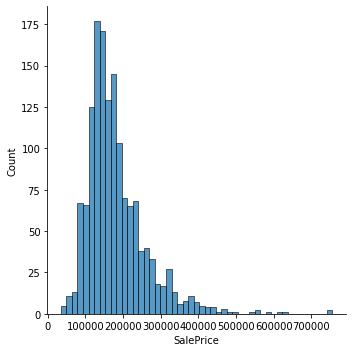

In [55]:
sns.displot(df.SalePrice)

## Let's add more complexity to histogram vizualizations. Does price change for different values of GaragaFinish attribute?

#### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

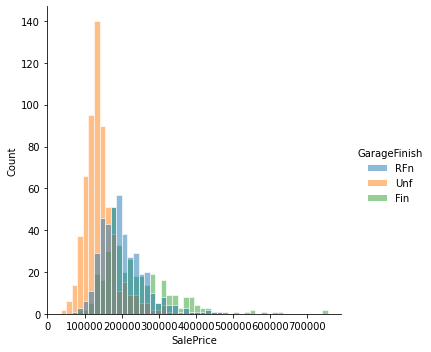

In [56]:
sns.displot(data=df, x='SalePrice', hue='GarageFinish', edgecolor='white')

Nižší cena pro domy bez garáže

In [57]:
df[['GarageFinish', 'SalePrice']].describe(include='all')

,GarageFinish,SalePrice
count,1379,1460.000000
unique,3,NaN
top,Unf,NaN
freq,605,NaN
mean,NaN,180921.195890
std,NaN,79442.502883
min,NaN,34900.000000
25%,NaN,129975.000000
50%,NaN,163000.000000
75%,NaN,214000.000000


### We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

In [58]:
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')

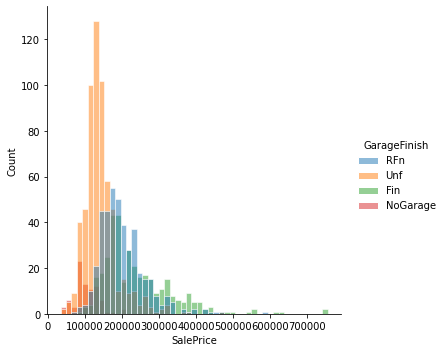

In [59]:
sns.displot(data=df, x='SalePrice', hue='GarageFinish', edgecolor='white')

### Another very useful tecnique for the numerical features distributions are boxplots
- Did you see any of these before?
- How should we read them?
    - Quartiles
    - Median
    - Box size
    - Outliers and IQR
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

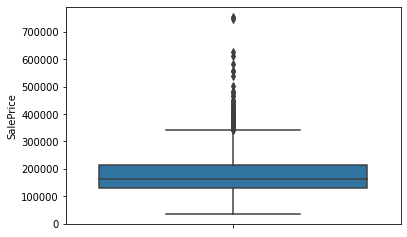

In [60]:
sns.boxplot(data=df, y='SalePrice')

## Let's take a look at the *SalePrice* for different *BldgType* values 
- What can we say about the prices?

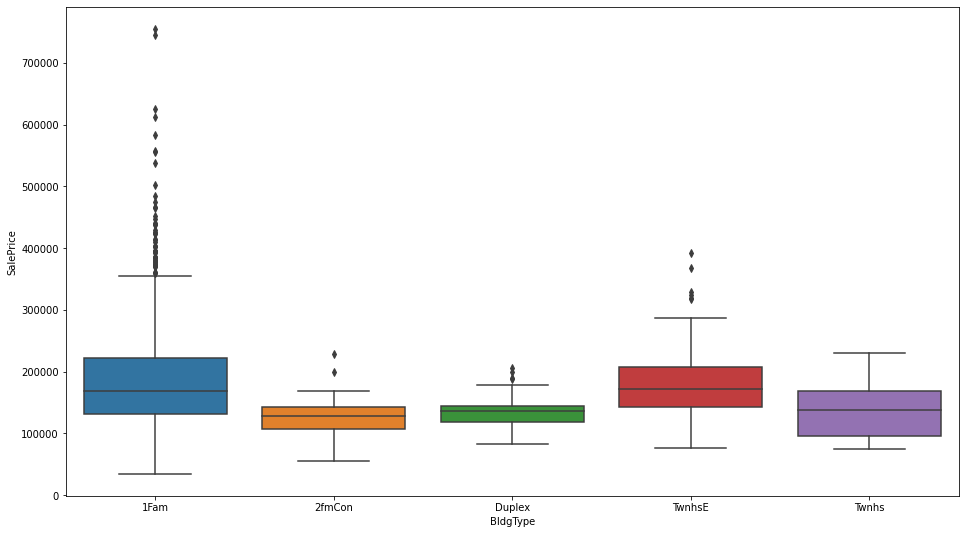

In [61]:
fig = plt.figure(figsize=(16, 9))
sns.boxplot(data=df, y='SalePrice', x='BldgType')

## We have an information about a month and a year for the sold houses.
### Can you vizualize what was the average price of the house by quarters?

* We need to create a new columns with merged Year and Quarter information in this pattern: '2010-Q1','2010-Q2', etc.
* We can map the values using the *apply* function or use string concatenation directly
* If you need to change data type of the columns, you can use *astypy*

In [62]:
df['QuarterSold'] = df.MoSold // 4  + 1
df['YearQuarterSold'] = df.YrSold.astype(str) + '-' + df.QuarterSold.astype(str)
df['YearQuarterSold'].head()

0    2008-1
1    2007-2
2    2008-3
3    2006-1
4    2008-4
Name: YearQuarterSold, dtype: object

In [63]:
df['YearQuarterSoldApply'] = df.loc[:, ['MoSold', 'YrSold']].apply(lambda x: f'{x[1]}-{(x[0]//4 + 1)}', axis=1)
df['YearQuarterSoldApply'].head()

0    2008-1
1    2007-2
2    2008-3
3    2006-1
4    2008-4
Name: YearQuarterSoldApply, dtype: object

### Compute the average price for the *YearQuarterSold* attribute

In [64]:
df_agg = df.groupby('YearQuarterSold').SalePrice.mean().reset_index(name='MeanPrice')
df_agg.head()

,YearQuarterSold,MeanPrice
0,2006-1,190553.522727
1,2006-2,173835.900000
2,2006-3,197681.705128
3,2006-4,185545.000000
4,2007-1,178489.159091


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

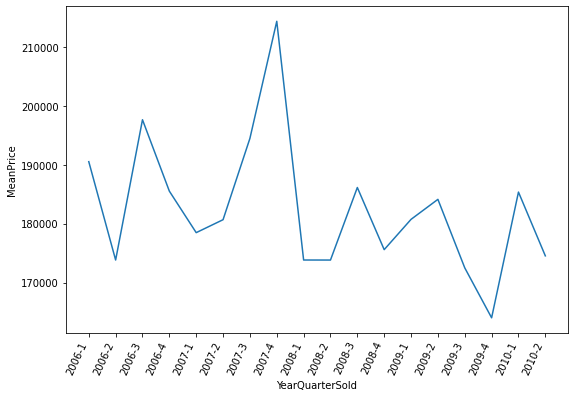

In [65]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_agg, x='YearQuarterSold', y='MeanPrice')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [66]:
df.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,180.0,173835.900000,78147.648285,79000.0,129675.0,157500.0,197725.0,625000.0
2,2006-3,78.0,197681.705128,86560.713023,35311.0,133625.0,178000.0,244933.5,465000.0
3,2006-4,12.0,185545.000000,69292.448559,98600.0,132000.0,175000.0,236000.0,290000.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,176.0,180689.732955,82447.813812,79000.0,129000.0,156000.0,205787.5,745000.0
6,2007-3,91.0,194509.890110,72455.235610,64500.0,137500.0,181000.0,238500.0,392000.0
7,2007-4,18.0,214414.500000,81118.090800,84500.0,144750.0,231000.0,268975.0,340000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,164.0,173830.396341,63180.075472,40000.0,135000.0,165200.0,200450.0,385000.0


In [67]:
df_agg = df.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

,YearQuarterSold,variable,value
0,2006-1,min,52500.0
1,2006-2,min,79000.0
2,2006-3,min,35311.0
3,2006-4,min,98600.0
4,2007-1,min,39300.0
...,...,...,...
67,2009-2,max,555000.0
68,2009-3,max,402861.0
69,2009-4,max,263435.0
70,2010-1,max,611657.0


## What can we say about the minimum and maximum values?
- hint - std. deviation? outliers?

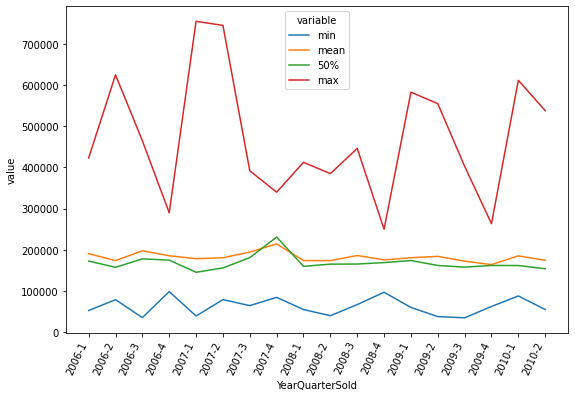

In [68]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

## Combining boxplots with calculated mean value

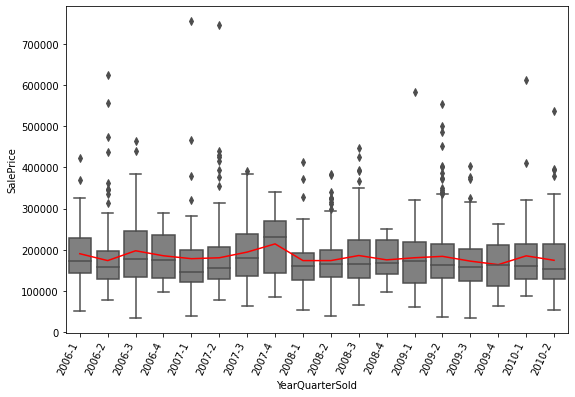

In [69]:
fig = plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='YearQuarterSold', y='SalePrice', color='grey', order=sorted(df.YearQuarterSold.unique()))
sns.lineplot(data=df_agg, x='YearQuarterSold', y='mean', color='red')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
- We will use standard bar plot
- In which quarter were the most houses sold?
- Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [70]:
df_cnt = df.groupby('YearQuarterSold').SalePrice.count().reset_index(name='Count')
df_cnt

,YearQuarterSold,Count
0,2006-1,44
1,2006-2,180
2,2006-3,78
3,2006-4,12
4,2007-1,44
5,2007-2,176
6,2007-3,91
7,2007-4,18
8,2008-1,41
9,2008-2,164


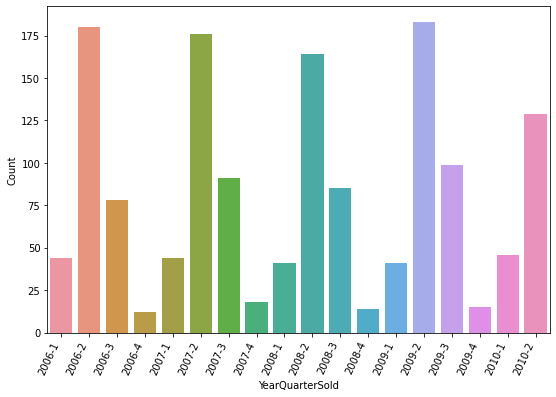

In [71]:
fig = plt.figure(figsize=(9,6))
sns.barplot(data=df_cnt, x='YearQuarterSold', y='Count')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# Pairplot
- Plot pairwise relationships in a dataset
- Scatterplots for multiple pairs of numerical attributes, see [this](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- Select only numerical attributes from dataframe - *select_dtypes*

In [72]:
df.select_dtypes(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,QuarterSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,3
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,3
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,2
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,2


#### If the dataset has too many columns, it is good to set pandas parameter *display.max_columns* to None so there is no such limit

In [73]:
with pd.option_context('display.max_columns', None):
  display(df.select_dtypes(include=np.number))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,QuarterSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,3
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,2
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,2


#### Select only an interesting features for paiplot visualization
- The pairplot might be too big to see anything in the visualization

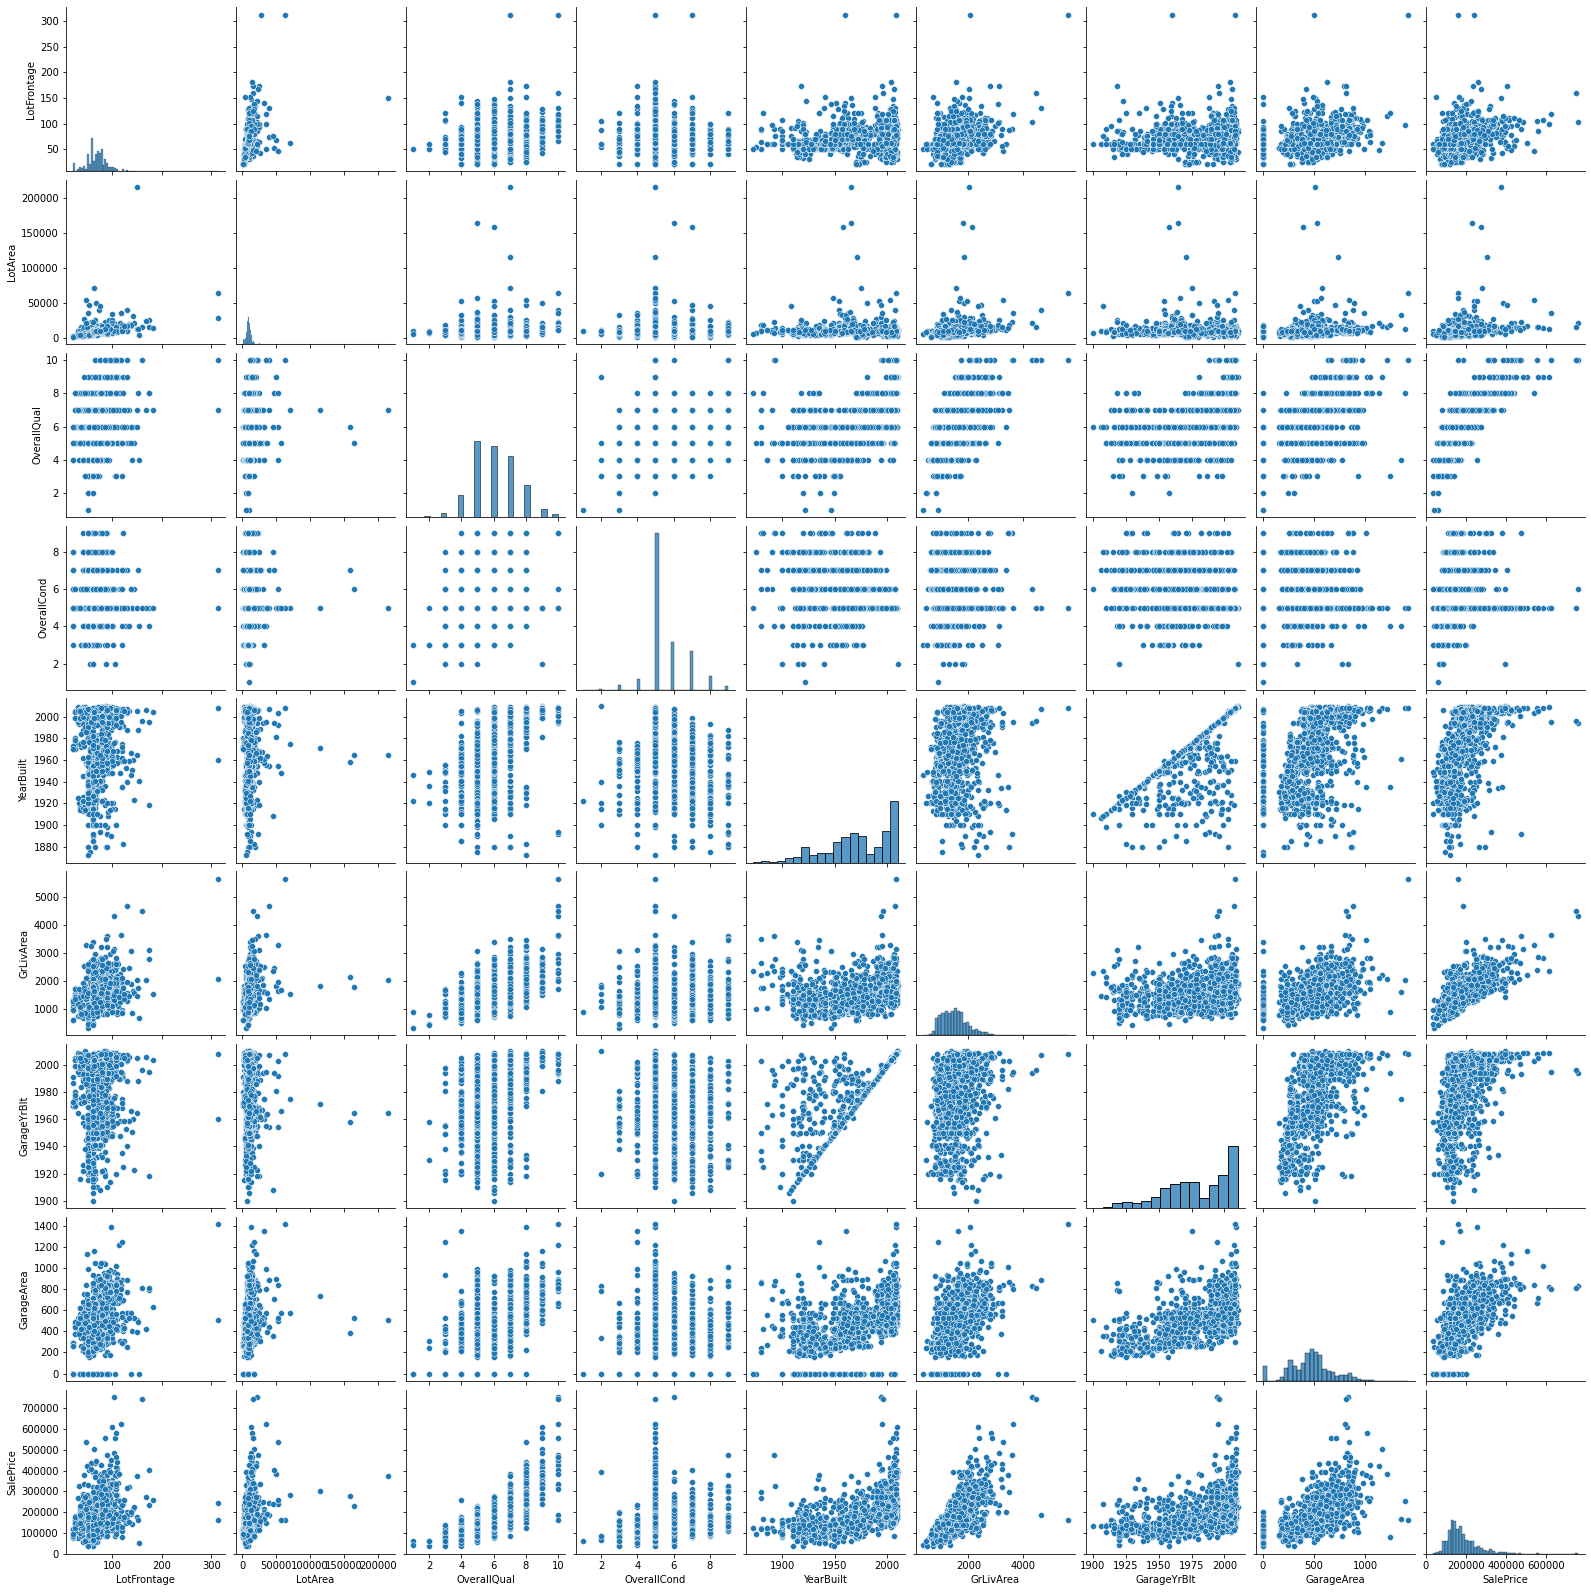

In [74]:
selected_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(df[selected_columns])

#### Notice that both OverallQual and OverallCond columns are rather categorical features even though they are represented by numerical values thus one would expect that the features are numerical but they aren't so scatter plot may not be the best way to visualize this type of data

- Let's select only appropropriate features this time

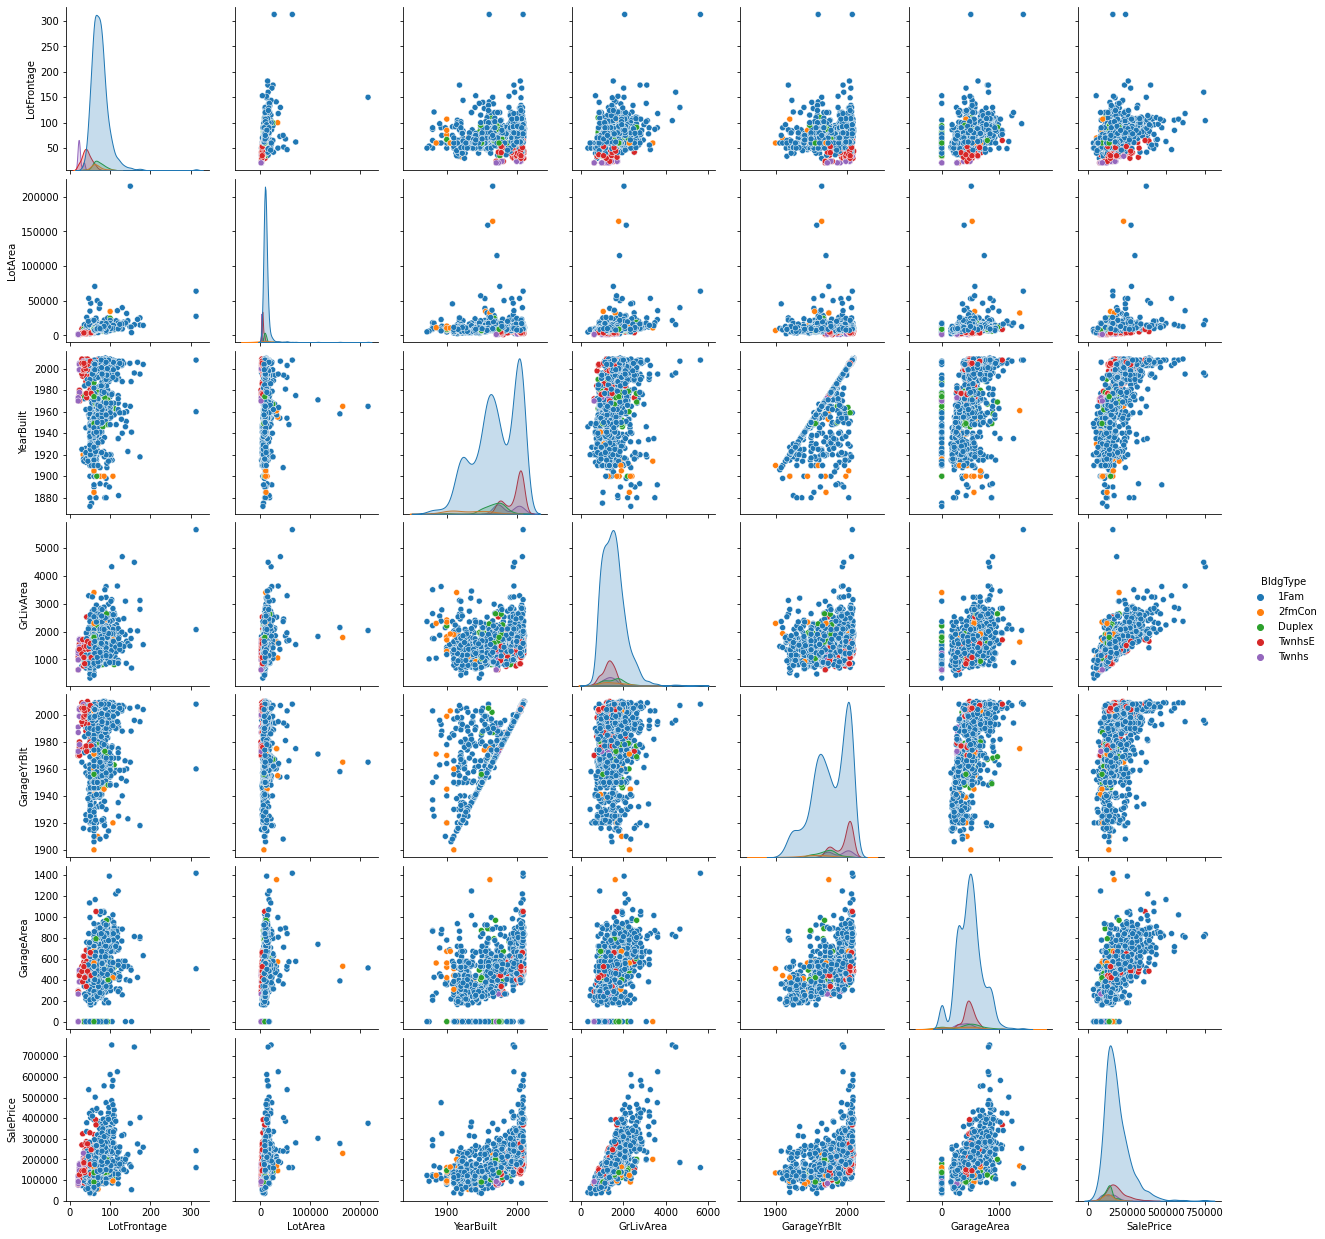

In [75]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(data=df, vars=selected_columns, hue='BldgType')

## Use swarmplot/striplot for displaying OverallQual, OverallCond as categorical-numerical relationship

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; y

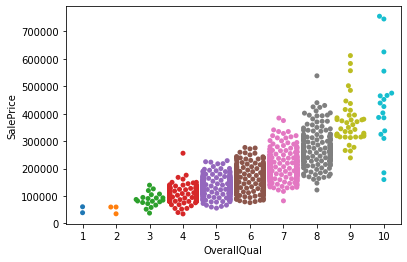

In [76]:
sns.swarmplot(data=df, x='OverallQual', y='SalePrice')

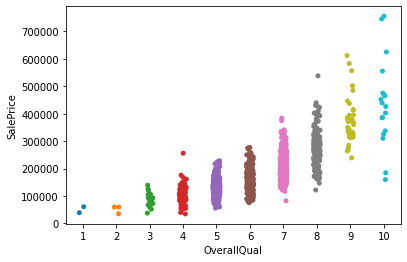

In [77]:
sns.stripplot(data=df, x='OverallQual', y='SalePrice')

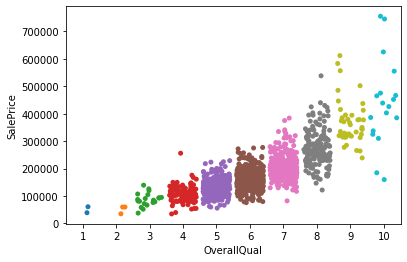

In [78]:
sns.stripplot(data=df, x='OverallQual', y='SalePrice', jitter=0.4)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


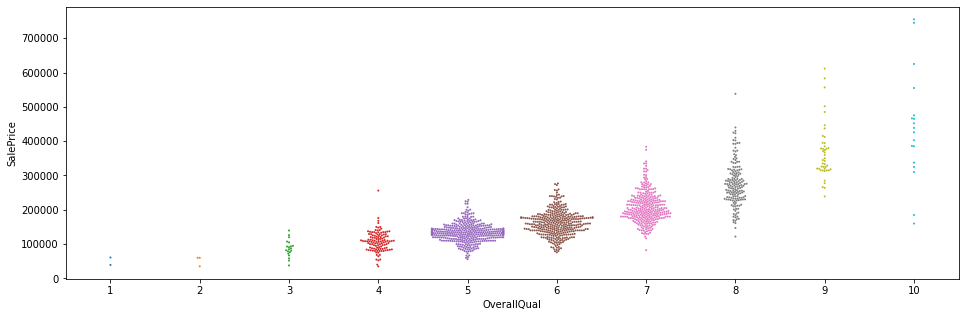

In [79]:
plt.figure(figsize=(16,5))
sns.swarmplot(data=df, x='OverallQual', y='SalePrice', size=2)

# Are you able to say which categorical attributes effect the price right now?
- Yeah... me neither so let's find out by plotting the data

## Start with selection of only the categorical features

In [80]:
qualitative_columns = df.select_dtypes(exclude=np.number).columns
for c in qualitative_columns:
    if df[c].isnull().any():        
        df[c] = df[c].fillna('MISSING')
    
qualitative_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'YearQuarterSold', 'YearQuarterSoldApply'],
      dtype='object')

In [81]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,QuarterSold,YearQuarterSold,YearQuarterSoldApply
0,1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,0,2,2008,WD,Normal,208500,1,2008-1,2008-1
1,2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,0,5,2007,WD,Normal,181500,2,2007-2,2007-2
2,3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,0,9,2008,WD,Normal,223500,3,2008-3,2008-3
3,4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,0,2,2006,WD,Abnorml,140000,1,2006-1,2006-1
4,5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,0,12,2008,WD,Normal,250000,4,2008-4,2008-4


### Now we need to [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) the dataset into the standard data format

In [82]:
f = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative_columns)
f.head()

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


### And finally we can use the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to crate a grid of subplots and map boxplot to every cell

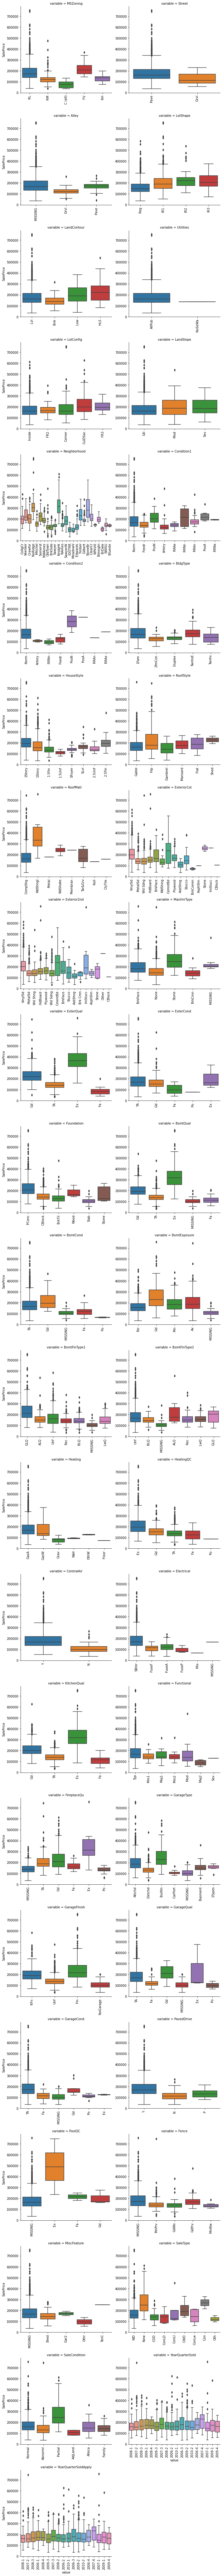

In [83]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

## Another very useful feature is the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function for defining our own grids
### We will plot boxplots together with the individual value counts using barplot for every categorical feature

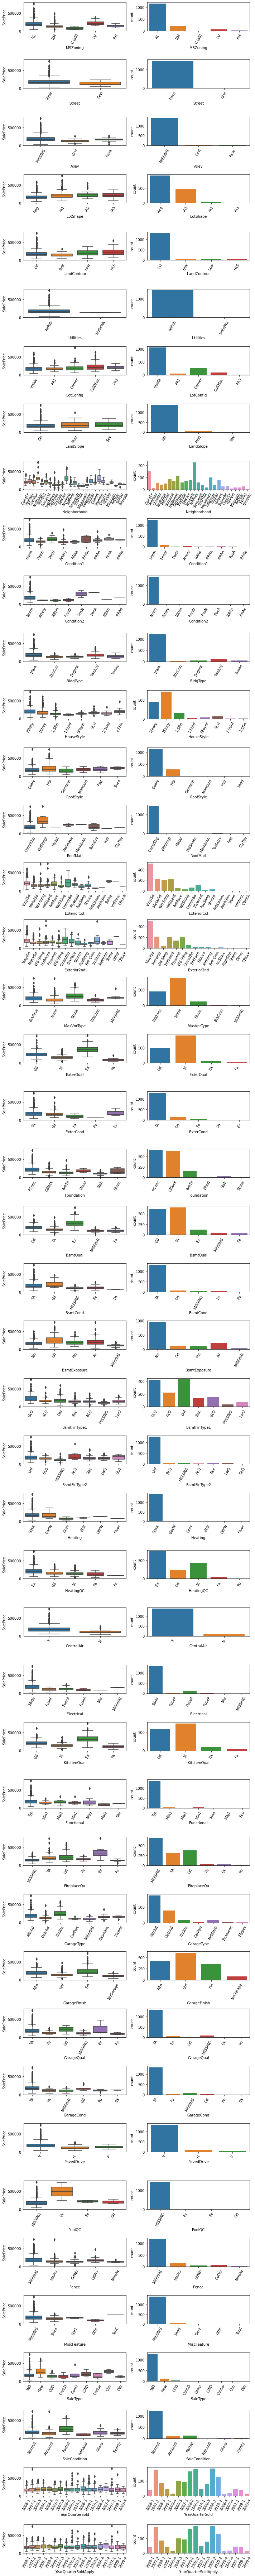

In [84]:
fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(10, 100))

for i, col in enumerate(qualitative_columns):
    ax_left = fig.axes[2*i]
    ax_right = fig.axes[2*i + 1]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

# Categorical heatmap
### Let's vizualize a relationship between *HouseStyle* and *Neighborhood* using heatmap with counts of every combination of the two attributes

In [85]:
df_agg = df.groupby(['HouseStyle', 'Neighborhood']).Id.count().reset_index(name='count')
df_agg

,HouseStyle,Neighborhood,count
0,1.5Fin,BrkSide,25
1,1.5Fin,ClearCr,6
2,1.5Fin,Crawfor,9
3,1.5Fin,Edwards,22
4,1.5Fin,Gilbert,1
...,...,...,...
91,SLvl,NWAmes,7
92,SLvl,Sawyer,5
93,SLvl,SawyerW,1
94,SLvl,Timber,4


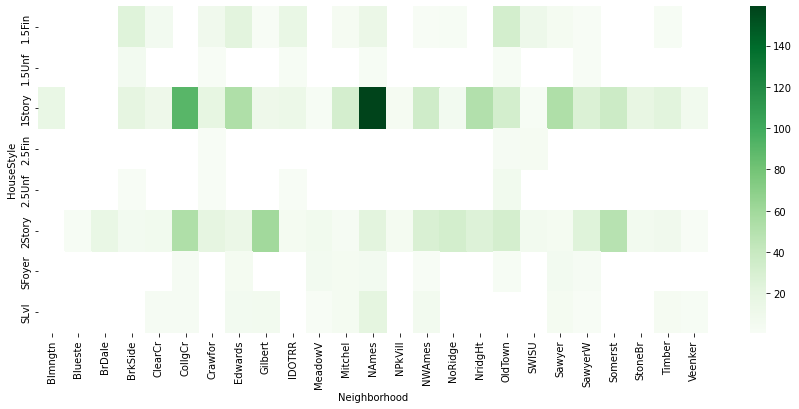

In [86]:
plt.figure(figsize=(15, 6))
sns.heatmap(data=df_agg.pivot(index='HouseStyle', columns='Neighborhood', values='count'), cmap='Greens')
plt.show()

### Let's vizualize a relationship between *HouseStyle* and *BsmtFinType1* using heatmap with counts of every combination of the two attributes

In [87]:
df_agg = df.groupby(['HouseStyle', 'BsmtFinType1']).Id.count().reset_index(name='count')
df_agg.head()

,HouseStyle,BsmtFinType1,count
0,1.5Fin,ALQ,13
1,1.5Fin,BLQ,18
2,1.5Fin,GLQ,9
3,1.5Fin,LwQ,17
4,1.5Fin,MISSING,5


**HouseStyle: Style of dwelling**

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

**BsmtFinType1: Rating of basement finished area**

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

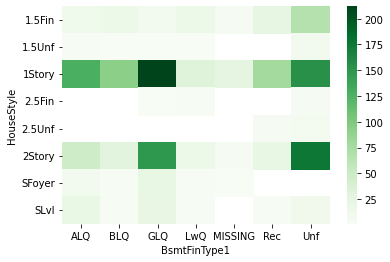

In [88]:
sns.heatmap(data=df_agg.pivot(index='HouseStyle', columns='BsmtFinType1', values='count'), cmap='Greens')

# Correlation

Resources containing refreshing informations about correlations:
- Take a look at [this link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
- See also [this](https://www.simplypsychology.org/correlation.html) or [this](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp) for some more info about the topic

In [89]:
corr_mat = df.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,QuarterSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.012901
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.000364
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.017719
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.003605
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.062931
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.010845
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.013916
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.021669
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,-0.022697
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.014575


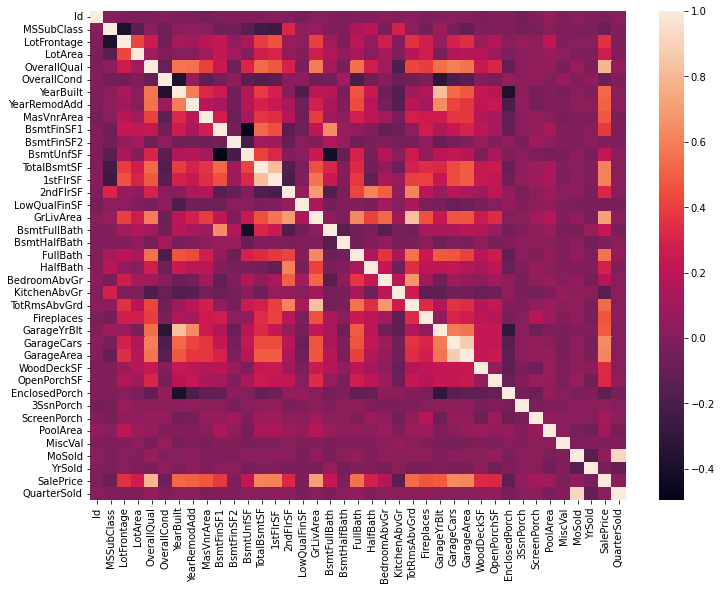

In [90]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat)

## Which color will be more appropropriate for corellation representation?
- Change color map *cmap* (e.g. RdYlGn)
- Set limits to adjust color map values from -1 to 1 (attributes *vmin*, *vmax*)

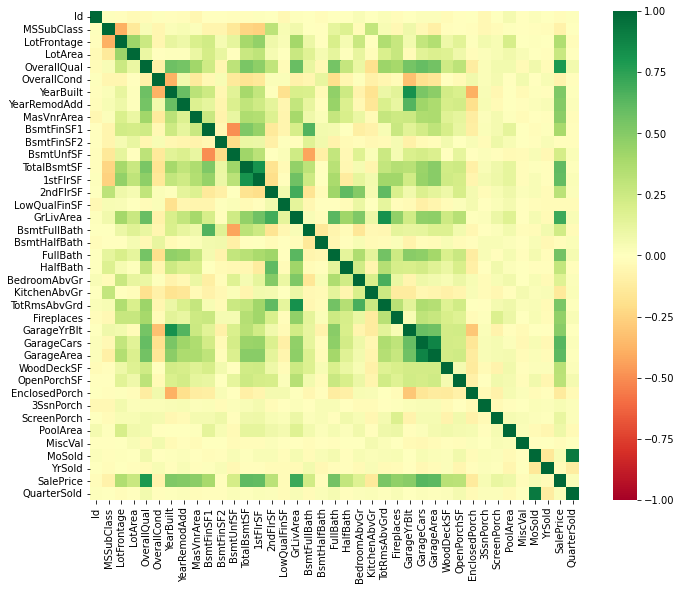

In [91]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, square=True, cmap='RdYlGn', vmin=-1, vmax=1)

## What can we say about the values in this correlation sub-matrix?
- Let's focus only some subset of the features

In [92]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
corr_mat = df[selected_columns].corr()
corr_mat

,LotFrontage,LotArea,YearBuilt,GrLivArea,GarageYrBlt,GarageArea,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.402797,0.070250,0.344997,0.351799
LotArea,0.426095,1.000000,0.014228,0.263116,-0.024947,0.180403,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.199010,0.825667,0.478954,0.522897
GrLivArea,0.402797,0.263116,0.199010,1.000000,0.231197,0.468997,0.708624
GarageYrBlt,0.070250,-0.024947,0.825667,0.231197,1.000000,0.564567,0.486362
GarageArea,0.344997,0.180403,0.478954,0.468997,0.564567,1.000000,0.623431
SalePrice,0.351799,0.263843,0.522897,0.708624,0.486362,0.623431,1.000000


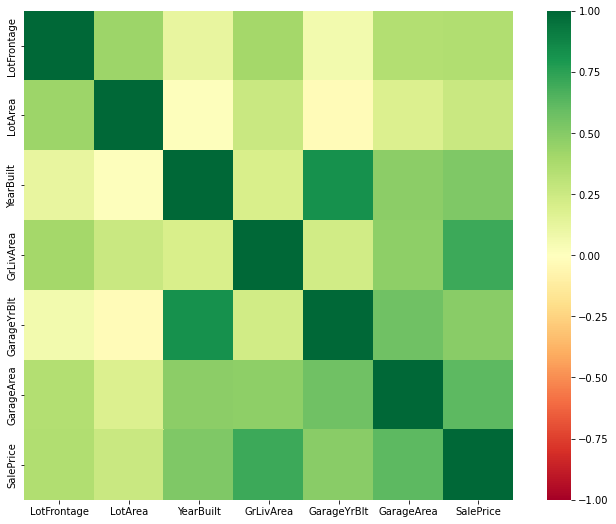

In [93]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, square=True, cmap='RdYlGn', vmin=-1, vmax=1)

## Add values to the heatmap and amplify heatmap's readability

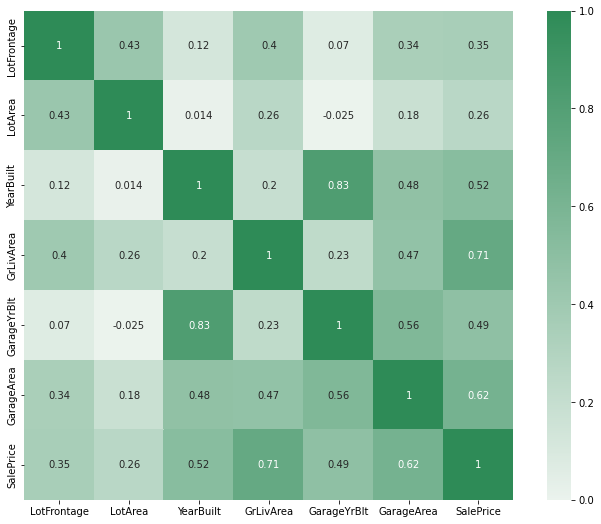

In [94]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, square=True, cmap=sns.light_palette("seagreen", as_cmap=True), vmin=0.0, annot=True)

## We highly recommend taking a look at the plot gallery for some inspiration!
- https://seaborn.pydata.org/api.html

# Individual work

## Find the oldest sold house for each locality (attribute **Neighborhood**).

In [95]:
df[['Neighborhood', 'YearBuilt']].groupby(['Neighborhood']).min()

,YearBuilt
Neighborhood,
Blmngtn,2003
Blueste,1980
BrDale,1970
BrkSide,1908
ClearCr,1908
CollgCr,1969
Crawfor,1910
Edwards,1900
Gilbert,1948


## Explore the meaning of values in attribute **LotConfig**. Is there any relationship between **LotConfig** and **LotFrontage**, create visualization and describe it.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


LotFrontage                         
                  min    max       mean median
LotConfig                                     
Corner           24.0  313.0  84.039801   80.0
CulDSac          30.0  168.0  59.911111   50.0
FR2              24.0   98.0  63.515152   64.0
FR3              35.0  129.0  70.750000   59.5
Inside           21.0  313.0  67.715686   68.0

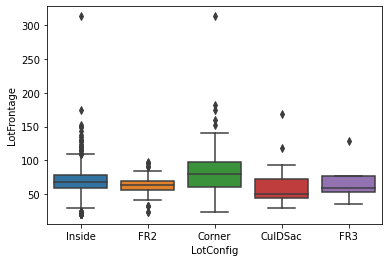

In [96]:
lotDF = df[['LotConfig', 'LotFrontage']]
lotDF['LotFrontage'] = pd.to_numeric(lotDF['LotFrontage'])
# It does not make sense for frontage to be zero considering all valid LotConfig
# values imply the lot is connected to a street
lotDF.dropna(inplace=True)

sns.boxplot(data=lotDF, x='LotConfig', y='LotFrontage')

mins = lotDF.groupby(['LotConfig']).agg(['min', 'max', 'mean', 'median'])
mins

Lots in cul-de-sacs tend to see lower frontages on average. Lots located on corners tend to see the highest frontages on average (and the highest variance).
The other configurations see rather similar values.

## Do various types of homes differ in living area? Explore the effect of **HouseStyle** and **GrLivArea**. Create visualization and describe it.

In [97]:
df.groupby(['HouseStyle', 'GrLivArea']).count()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
HouseStyle GrLivArea                                                           
1.5Fin     754         1           1         1            1        1       1   
           912         1           1         1            1        1       1   
           924         2           2         2            2        2       2   
           968         1           1         1            1        1       1   
           1020        1           1         1            1        1       1   
...                   ..         ...       ...          ...      ...     ...   
SLvl       1920        1           1         1            1        1       1   
           2119        1           1         1            0        1       1   
           2201        1           1         1            0        1       1   
           2704        1           1         1            1        1       1   
           2978        1           1         1            1        1       1   

                      Alley  LotShape  LandContour  Utilities  ...  \
HouseStyle GrLivArea                                           ...   
1.5Fin     754            1         1            1          1  ...   
           912            1         1            1          1  ...   
           924            2         2            2          2  ...   
           968            1         1            1          1  ...   
           1020           1         1            1          1  ...   
...                     ...       ...          ...        ...  ...   
SLvl       1920           1         1            1          1  ...   
           2119           1         1            1          1  ...   
           2201           1         1            1          1  ...   
           2704           1         1            1          1  ...   
           2978           1         1            1          1  ...   

                      MiscFeature  MiscVal  MoSold  YrSold  SaleType  \
HouseStyle GrLivArea                                                   
1.5Fin     754                  1        1       1       1         1   
           912                  1        1       1       1         1   
           924                  2        2       2       2         2   
           968                  1        1       1       1         1   
           1020                 1        1       1       1         1   
...                           ...      ...     ...     ...       ...   
SLvl       1920                 1        1       1       1         1   
           2119                 1        1       1       1         1   
           2201                 1        1       1       1         1   
           2704                 1        1       1       1         1   
           2978                 1        1       1       1         1   

                      SaleCondition  SalePrice  QuarterSold  YearQuarterSold  \
HouseStyle GrLivArea                                                           
1.5Fin     754                    1          1            1                1   
           912                    1          1            1                1   
           924                    2          2            2                2   
           968                    1          1            1                1   
           1020                   1          1            1                1   
...                             ...        ...          ...              ...   
SLvl       1920                   1          1            1                1   
           2119                   1          1            1                1   
           2201                   1          1            1                1   
           2704                   1          1            1                1   
           2978                   1          1            1                1   

                      YearQuarterSoldApply  
HouseStyle GrLivArea                        
1.

## Does **BldfType** have effect on **GrLivArea**? Create visualization and describe it.

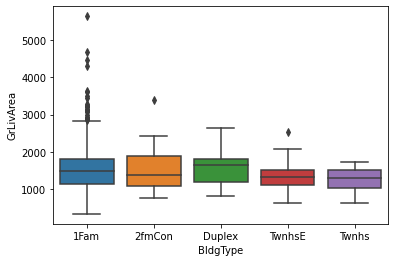

In [98]:
sns.boxplot(data=df, x='BldgType', y='GrLivArea')

Living area tends to vary the most for one family houses. Living area also tends to be the highest (on average) for duplexes. Units in a row of connected houses tend to be mostly the same as the rest of the units on the inside, though
they can sometimes be a little bit bigger.

## How are the **HouseStyle** and **BldgType** values combined? What is the most common combination? Which feature type are these two attributes and what type of visualization can be used to show number of houses in all combinations between values in these two attributes?

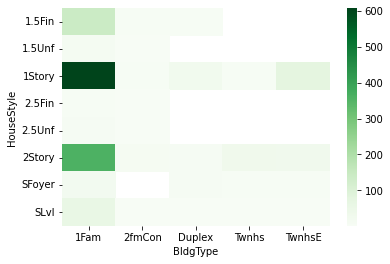

In [99]:
df_agg = df.groupby(['HouseStyle', 'BldgType']).Id.count().reset_index(name='count')
sns.heatmap(data=df_agg.pivot(index='HouseStyle', columns='BldgType', values='count'), cmap='Greens')

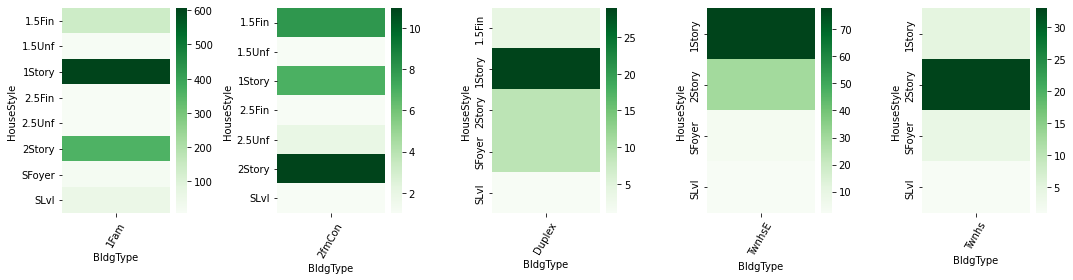

In [100]:
bd_type = df['BldgType'].unique().tolist()

# df_agg = df[df['BldgType'] == '1Fam'].groupby(['HouseStyle', 'BldgType']).Id.count().reset_index(name='count')

fig, axes = plt.subplots(1, len(bd_type), figsize=(15, 4))

for i, btype in enumerate(bd_type):
    filtered = df[df['BldgType'] == btype]
    df_agg = filtered.groupby(['HouseStyle', 'BldgType']).Id.count().reset_index(name='count')
    ax = fig.axes[i]

    sns.heatmap(data=df_agg.pivot(index='HouseStyle', columns='BldgType', values='count'), cmap='Greens', ax=ax)

    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

Since both attributes are categorical, we can aggregate the data and use a heatmap. One story one family houses are the most commonly sold houses, followed by 2 story houses for a single family. There are multiple combinations
which go completely unrepresented.

## Is there any progress in type of foundation over the years? Take a look to attributes **Fondation** and **YearBuilt**, create visualization and describe it.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


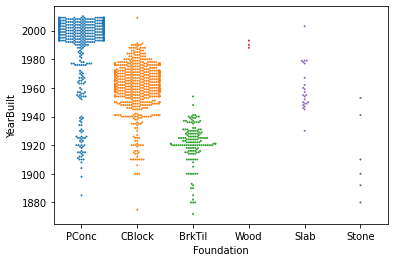

In [101]:
sns.swarmplot(data=df, x='Foundation', y='YearBuilt', size=2)

A swarm graph allows us to easily see how foundation building processes have evolved over time. Brick and tile foundations have been used until the 1940s,
when they were phased out and replaced by Cinder Block, which had been used until early 1990s. Since the 1990s, Poured concrete has been used for foundations of houses. Stone, slab and wood foundations are very rare.

## Show me your creativity :-). Come up with one more analytical question, create visualization and interpret results.

# Is there any form of correlation between property value and distance from Airport

Correlation: 0.39343066876570026


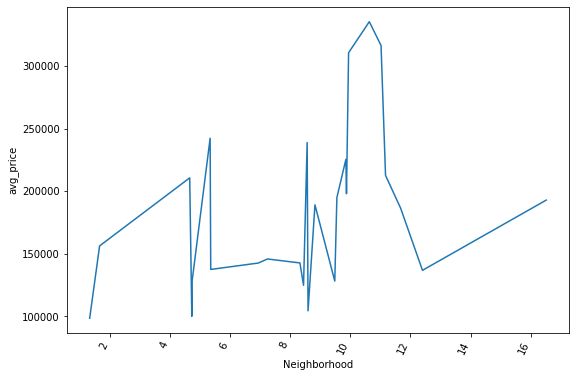

In [127]:
dist_map = {
    'Blmngtn': 9.55,
    'Blueste': 5.35,
    'BrDale': 8.59,
    'BrkSide': 8.44,
    'ClearCr': 11.17,
    'CollgCr': 9.87,
    'Crawfor': 4.65,
    'Edwards': 9.48,
    'Gilbert': 16.52,
    'IDOTRR': 4.72,
    'MeadowV': 1.32,
    'Mitchel': 1.65,
    'NAmes': 7.24,
    'NoRidge': 10.63,
    'NPkVill': 8.32,
    'NridgHt': 11.02,
    'NWAmes': 8.82,
    'OldTown': 4.73,
    'SWISU': 6.93,
    'Sawyer': 12.4,
    'SawyerW': 11.67,
    'Somerst': 9.85,
    'StoneBr': 9.94,
    'Timber': 5.33,
    'Veenker': 8.56,
}

priceDF = df[['Neighborhood', 'SalePrice']]

stats = priceDF.groupby(['Neighborhood']).agg(avg_price=('SalePrice', 'mean')).reset_index()
stats['Neighborhood'] = stats['Neighborhood'].map(lambda x: dist_map[x])

stats
#stats.info()

corr = stats['Neighborhood'].corr(stats['avg_price'])
print(f'Correlation: {corr}')


fig = plt.figure(figsize=(9,6))
sns.lineplot(data=stats, x='Neighborhood', y='avg_price')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

The big spike between 10 and 12 km of driving distance from the airport could suggestthat properties near the airport are less valuable due to possible noise, remoteproperties are cheap due to being remote, and there's a sweet spot where the propertiesare unaffected by the airport and yet close enough to provide easy access to said facility,causing more affluent citizens to move in and renovate their houses, driving the pricesfurther up.